In [1]:
!pip install pandas joblib
!pip install pandas numpy matplotlib opencv-python scikit-learn joblib seaborn
#Install the most basic data processing and model saving dependencies.

In [2]:
import sys
import pandas as pd
import pickle
import joblib
# Data loading
# Step 1: Simulate the old pandas.indexes module (for backward compatibility)
import pandas.core.indexes
sys.modules['pandas.indexes'] = pd.core.indexes

# Step 2: Use encoding='latin1' to decode the old pickle file
file_path = r'C:\Users\songy\OneDrive\Desktop\archive\LSWMD.pki'

with open(file_path, 'rb') as f:
    data = pickle.load(f, encoding='latin1')

print(" Successfully loaded the legacy pickle file!")
print("Data type:", type(data))

# Step 3: Save in a modern format 
modern_path = r'C:\Users\songy\OneDrive\Desktop\archive\LSWMD_modern.pkl'
joblib.dump(data, modern_path)

print(f" Conversion completed! Modern format file saved to:\n{modern_path}")
# We forcibly read in a very old pickle file (LSWMD.pki) and then re-saved it as a modern version (LSWMD_modern.pkl) to make it easier for modern Python/pandas to use.

 Successfully loaded the legacy pickle file!
Data type: <class 'pandas.core.frame.DataFrame'>
 Conversion completed! Modern format file saved to:
C:\Users\songy\OneDrive\Desktop\archive\LSWMD_modern.pkl


In [11]:
# Just a quick peek at the data！
data.shape # View the overall dimensionality of the data (number of rows：811457, number of columns：6).

(811457, 6)

In [12]:
data.head()
# This dataset has 6 columns:
# 1. waferMap: A 2D matrix image of the wafer (usually 52×52), which is the core data for all subsequent features/embedding.
# 2. dieSize: The number of chips (dies) on the wafer, e.g., 1683
# 3. lotName: The batch name to which the wafer belongs (e.g., lot1)
# 4. waferIndex: The wafer number within the same batch (e.g., 1, 2, 3, …)
# 5. trainTestLabel: Whether the sample is assigned to the training or test set (Training / Test)
# 6. failureType: Defect type label (e.g., 'none', 'center', 'donut', 'edge-loc', etc.)

# The most important columns are:
# - waferMap column: The actual image of the wafer (2D array)
# - failureType column: The defect category label of the wafer

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [23]:
#later testing
print("dieSize counts:")
print(data['dieSize'].value_counts())

dieSize counts:
dieSize
710.0     66961
515.0     45725
712.0     42572
1513.0    39322
776.0     29513
          ...  
861.0         1
12.0          1
50.0          1
96.0          1
60.0          1
Name: count, Length: 1266, dtype: int64


In [13]:
data.columns

Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'failureType'],
      dtype='object')

In [25]:
from collections import Counter

def count_array_col(series):
    c = Counter()
    for x in series.dropna():
        arr = np.array(x).ravel()
        for v in arr:
            c[str(v)] += 1
    return c

train_counter = count_array_col(data['trianTestLabel'])
print("Train/Test counts:")
print(train_counter)


Train/Test counts:
Counter({'Test': 118595, 'Training': 54355})


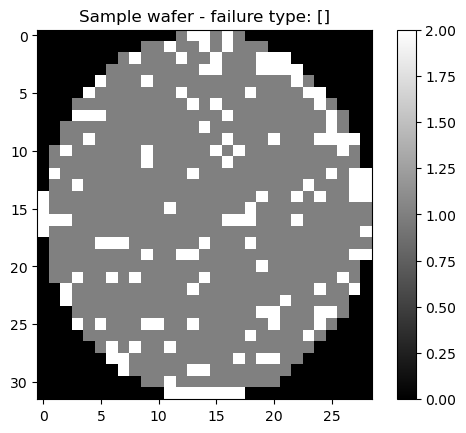

In [9]:
import matplotlib.pyplot as plt
import numpy as np


sample = data.sample(1).iloc[0] # randomly pick one
wafer_map = np.array(sample['waferMap'])

plt.imshow(wafer_map, cmap='gray')
plt.title(f"Sample wafer - failure type: {sample['failureType']}")
plt.colorbar()
plt.show()


In [26]:
import numpy as np

sample = data.iloc[0]['waferMap']
print("Calculated die count:", np.sum(np.array(sample) > 0))
print("Dataset dieSize:     ", data.iloc[0]['dieSize'])


Calculated die count: 1683
Dataset dieSize:      1683.0


It randomly selects a wafer from the dataset, converts the waferMap inside into a two-dimensional array and displays it as a grayscale image, while also marking the failure type of the wafer in the title.

In [10]:
import pandas as pd
import numpy as np

# Basic information
print(" Total number of samples:", len(data))
print(" Data columns:", data.columns.tolist())

# Convert failureType / trianTestLabel to strings for flattening
data['failureType_str'] = data['failureType'].astype(str)
data['trianTestLabel_str'] = data['trianTestLabel'].astype(str)

# Remove brackets and quotes, then extract the first element
data['failureType_flat'] = (
    data['failureType_str']
    .str.replace(r"[\[\]']", "", regex=True)  # remove [[ ]]
    .str.split()                             # split by space
    .str[0]                                  # take the first word (e.g., none, Center)
)

data['trianTestLabel_flat'] = (
    data['trianTestLabel_str']
    .str.replace(r"[\[\]']", "", regex=True)
    .str.split()
    .str[0]
)

# Defect type distribution
print("\n Defect type distribution (Top 10):")
print(data['failureType_flat'].value_counts().head(10))

# Train/Test label distribution
print("\n Train/Test sample distribution:")
print(data['trianTestLabel_flat'].value_counts())

# Convert labels into simple strings
# Count and show each label’s distribution


 Total number of samples: 811457
 Data columns: ['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel', 'failureType']

 Defect type distribution (Top 10):
failureType_flat
none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
Name: count, dtype: int64

 Train/Test sample distribution:
trianTestLabel_flat
Test        118595
Training     54355
Name: count, dtype: int64


In [16]:
# extract shapes of wafer map 
shapes = data['waferMap'].apply(lambda x: np.array(x).shape)

# calculate their frequency 
shape_counts = shapes.value_counts()

print(" waferMap size distribution（Top 10）：")
print(shape_counts.head(10))

# Extract the shape (dimension) of each wafer map
# Count and display how often each shape appears in the dataset


 waferMap size distribution（Top 10）：
waferMap
(32, 29)    108687
(25, 27)     64083
(49, 39)     39323
(26, 26)     30078
(30, 34)     29513
(33, 33)     23886
(33, 29)     20276
(39, 37)     15327
(52, 59)     14812
(31, 31)     14569
Name: count, dtype: int64


In [11]:
# Extract the shape of each wafer map
shapes = data['waferMap'].apply(lambda x: np.array(x).shape)

# Count the frequency of different shapes
shape_counts = shapes.value_counts()

print(" waferMap shape distribution (Top 10):")
print(shape_counts.head(10))


 waferMap shape distribution (Top 10):
waferMap
(32, 29)    108687
(25, 27)     64083
(49, 39)     39323
(26, 26)     30078
(30, 34)     29513
(33, 33)     23886
(33, 29)     20276
(39, 37)     15327
(52, 59)     14812
(31, 31)     14569
Name: count, dtype: int64


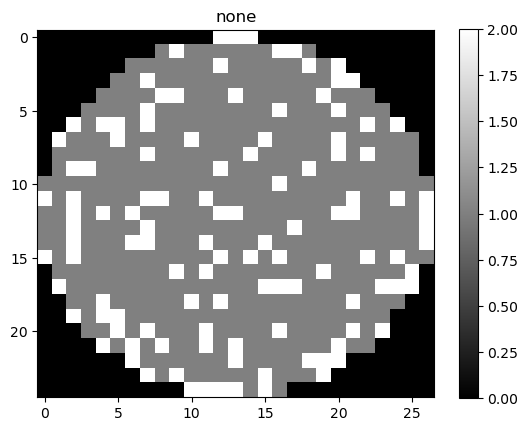

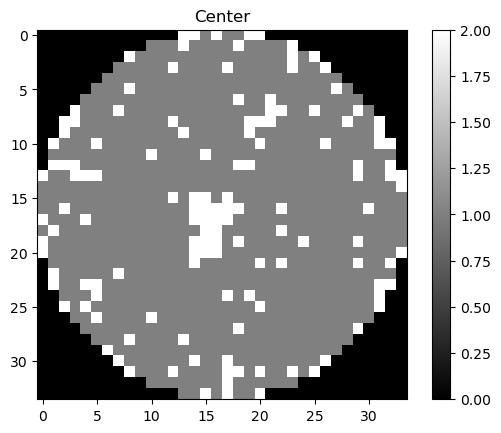

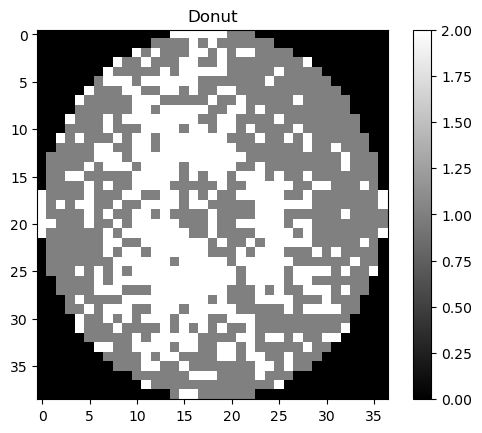

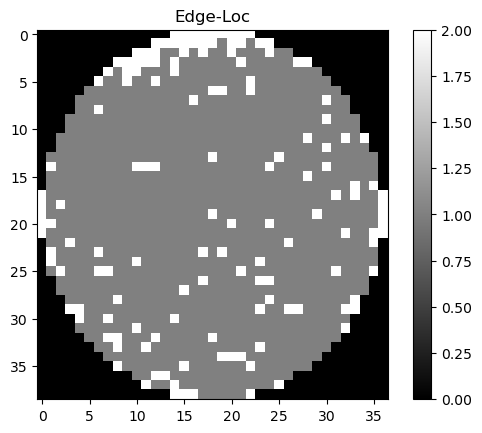

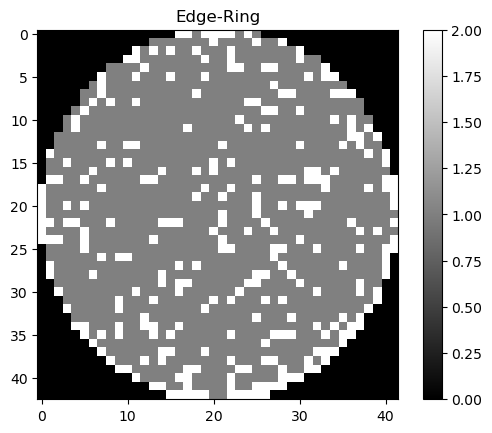

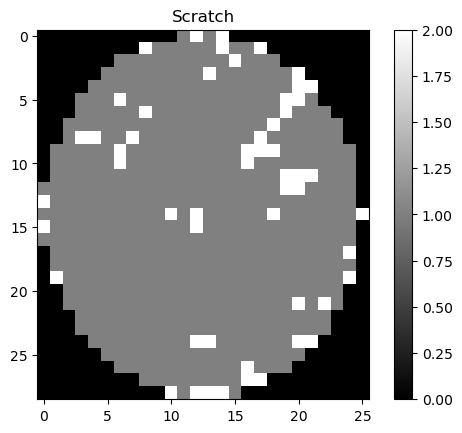

In [12]:
import matplotlib.pyplot as plt
import random

def plot_random_wafer(df, defect_type):
    subset = df[df['failureType_flat'] == defect_type]
    if len(subset) == 0:
        print(f"No samples of type {defect_type}")
        return
    sample = subset.sample(1).iloc[0]
    wafer = np.array(sample['waferMap'])
    plt.imshow(wafer, cmap='gray')
    plt.title(f"{defect_type}")
    plt.colorbar()
    plt.show()

for defect in ['none', 'Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Scratch']:
    plot_random_wafer(data, defect)
    
# Select a random sample for a given defect type
# and visualize its wafer map in grayscale



In [19]:
label_counts = data['failureType_flat'].value_counts()
print(label_counts.describe())
print("\n（<100） ：")
print(label_counts[label_counts < 100])
# Count the number of samples for each defect type
# Summarize the distribution and show rare classes (< 100 samples)


count         9.000000
mean      19216.666667
std       48175.274906
min         149.000000
25%         866.000000
50%        3593.000000
75%        5189.000000
max      147431.000000
Name: count, dtype: float64

（<100） ：
Series([], Name: count, dtype: int64)


In [20]:
# Full version: WM-811K dataset 60/20/20 split (including unsupervised version)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Keep only waferMap and label columns
df = data[['waferMap', 'failureType_flat']].copy()

# Drop NaN values from the label column
df_clean = df.dropna(subset=['failureType_flat']).reset_index(drop=True)
print(f" Total number of samples after cleaning: {len(df_clean)}")
# ！！！ IMPORTANT: These removed samples are NOT "normal wafers" — they are simply UNLABELED (missing failureType),
# and can later be manually re-selected for separate experimental comparison if needed.

# Step 1: Train (60%) vs Temp (40%)
train_df, temp_df = train_test_split(
    df_clean,
    test_size=0.4,
    random_state=42,
    stratify=df_clean['failureType_flat']   # keep class distribution consistent
)

# Step 2: Temp → Validation (20%) vs Test (20%)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=42,
    stratify=temp_df['failureType_flat']
)

print(" Split results (supervised version):")
print(f"Train set: {len(train_df)}")
print(f"Validation set: {len(val_df)}")
print(f"Test set: {len(test_df)}")

# Optional: Check class distribution consistency
print("\nTrain set class distribution (Top 5):")
print(train_df['failureType_flat'].value_counts(normalize=True).head())
print("\nValidation set class distribution (Top 5):")
print(val_df['failureType_flat'].value_counts(normalize=True).head())
print("\nTest set class distribution (Top 5):")
print(test_df['failureType_flat'].value_counts(normalize=True).head())

# Unsupervised learning version (train set contains only 'none' samples)
train_unsup_df = train_df[train_df['failureType_flat'] == 'none'].reset_index(drop=True)
val_unsup_df   = val_df.reset_index(drop=True)   # validation set contains all classes
test_unsup_df  = test_df.reset_index(drop=True)  # test set contains all classes

print("\n Split results (unsupervised version):")
print(f"Train (none only): {len(train_unsup_df)}")
print(f"Validation (all): {len(val_unsup_df)}")
print(f"Test (all): {len(test_unsup_df)}")

# Optional: Save to files for later use
train_unsup_df.to_pickle("train_unsupervised.pkl")
val_unsup_df.to_pickle("val_unsupervised.pkl")
test_unsup_df.to_pickle("test_unsupervised.pkl")

print("\n Saved train/val/test datasets (unsupervised version)")


 Total number of samples after cleaning: 172950
 Split results (supervised version):
Train set: 103770
Validation set: 34590
Test set: 34590

Train set class distribution (Top 5):
failureType_flat
none         0.852453
Edge-Ring    0.055970
Edge-Loc     0.029999
Center       0.024824
Loc          0.020777
Name: proportion, dtype: float64

Validation set class distribution (Top 5):
failureType_flat
none         0.852443
Edge-Ring    0.055970
Edge-Loc     0.030009
Center       0.024834
Loc          0.020757
Name: proportion, dtype: float64

Test set class distribution (Top 5):
failureType_flat
none         0.852443
Edge-Ring    0.055970
Edge-Loc     0.030009
Center       0.024834
Loc          0.020786
Name: proportion, dtype: float64

 Split results (unsupervised version):
Train (none only): 88459
Validation (all): 34590
Test (all): 34590

 Saved train/val/test datasets (unsupervised version)


In [21]:
#Part 3——first update
!pip install opencv-python

import cv2

def segment_wafer(wafer):
    wafer_norm = (wafer - np.min(wafer)) / (np.max(wafer) - np.min(wafer))
    wafer_uint8 = (wafer_norm * 255).astype(np.uint8)
    _, mask = cv2.threshold(wafer_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return mask


In [22]:
features = []
for wafer in data['waferMap']:
    wafer_np = np.array(wafer)
    features.append([
        np.mean(wafer_np),
        np.std(wafer_np),
        np.sum(wafer_np > 0) / wafer_np.size  # % of active pixels
    ])
features_df = pd.DataFrame(features, columns=['mean', 'std', 'active_ratio'])
features_df.head()
len(features_df)

811457

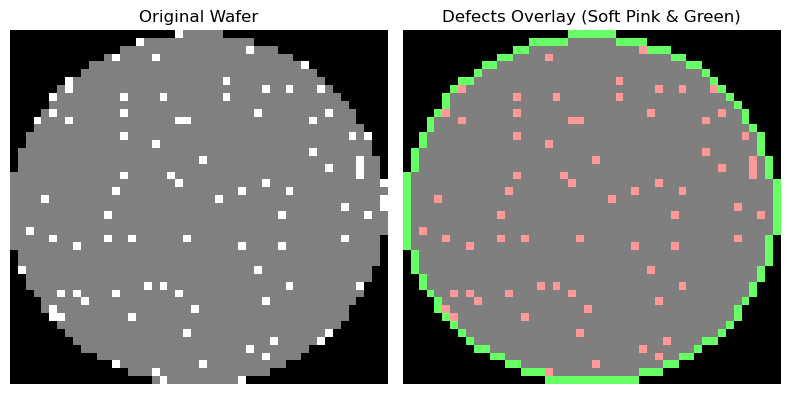

In [41]:
#  Wafer Segmentation and Visualization 
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_wafer(wafer, thresh_value=128):
    """
    Segment wafer map using manual thresholding.
    A fixed threshold (default=128) was selected after empirical testing.
    """
    wafer_norm = (wafer - np.min(wafer)) / (np.max(wafer) - np.min(wafer))
    wafer_uint8 = (wafer_norm * 255).astype(np.uint8)
    _, mask = cv2.threshold(wafer_uint8, thresh_value, 255, cv2.THRESH_BINARY)
    return mask

def visualize_defects_with_outline(wafer, mask):
    """
    Overlay detected defects (soft pink) and wafer outline (soft green) 
    for visual presentation.
    """
    # Normalize wafer for background visualization
    wafer_norm = (wafer - np.min(wafer)) / (np.max(wafer) - np.min(wafer))
    wafer_rgb = cv2.cvtColor((wafer_norm * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR).astype(np.float32) / 255.0
    
    # Find wafer contour
    contours, _ = cv2.findContours((wafer_norm > 0).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create overlay (soft pink defects + soft green outline)
    overlay = wafer_rgb.copy()
    overlay[mask > 0] = [1.0, 0.6, 0.6]    # soft pink defects
    cv2.drawContours(overlay, contours, -1, (0.4, 1.0, 0.4), 1)  # soft green outline
    
    # Visualization
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(wafer, cmap='gray')
    plt.title("Original Wafer")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title("Defects Overlay (Soft Pink & Green)")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example Execution 
sample = np.array(data.iloc[0]['waferMap'])
mask = segment_wafer(sample, thresh_value=128)
visualize_defects_with_outline(sample, mask)


In [42]:
import numpy as np
import cv2
import pandas as pd

def extract_classical_features(wafer, mask):
    """
    Compute classical, training-free features from a wafer map and its binary mask.
    wafer : 2D array (float or int)
    mask  : 2D array (uint8 or bool), foreground=1/255
    Returns a dict of features.
    """
    # Normalize wafer to [0,1] for intensity stats
    wafer = np.asarray(wafer, dtype=np.float32)
    wmin, wmax = np.min(wafer), np.max(wafer)
    wafer_norm = (wafer - wmin) / (wmax - wmin + 1e-8)

    # Ensure mask is 0/1
    m = (np.asarray(mask) > 0).astype(np.uint8)

    h, w = m.shape
    total = h * w
    yy, xx = np.mgrid[0:h, 0:w]

    #  A. Basic pixel stats 
    defect_pixels = int(m.sum())
    defect_ratio = defect_pixels / float(total)
    mean_intensity = float(wafer_norm.mean())
    std_intensity  = float(wafer_norm.std())

    #  B. Connected components (regions) 
    # Use 8-connectivity
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(m, connectivity=8)
    # stats: [label, x, y, width, height, area]; label 0 is background
    areas = stats[1:, cv2.CC_STAT_AREA] if num_labels > 1 else np.array([], dtype=np.int32)
    num_regions = int(len(areas))
    avg_region_area = float(areas.mean()) if num_regions > 0 else 0.0
    max_region_area = float(areas.max())  if num_regions > 0 else 0.0

    # Overall centroid of all defect pixels
    if defect_pixels > 0:
        cy, cx = np.column_stack(np.nonzero(m)).mean(axis=0)  # (row=y, col=x)
        centroid_x = float(cx / (w - 1))
        centroid_y = float(cy / (h - 1))
    else:
        centroid_x = np.nan
        centroid_y = np.nan

    # C. Radial features (distance from wafer center)
    cx0 = (w - 1) / 2.0
    cy0 = (h - 1) / 2.0
    rr = np.sqrt(((xx - cx0) ** 2 + (yy - cy0) ** 2))
    r_max = float(rr.max() + 1e-8)

    if defect_pixels > 0:
        r_def = rr[m > 0] / r_max  # normalized radius in [0,1]
        radial_mean = float(r_def.mean())
        radial_std  = float(r_def.std())
        edge_ratio  = float((r_def > 0.7).mean())  # fraction near outer ring
    else:
        radial_mean = np.nan
        radial_std  = np.nan
        edge_ratio  = 0.0

    # D. Symmetry features (IoU with flipped masks) 
    if defect_pixels > 0:
        m_lr = np.fliplr(m)
        m_ud = np.flipud(m)
        def iou(a, b):
            inter = np.logical_and(a, b).sum()
            union = np.logical_or(a, b).sum() + 1e-8
            return float(inter / union)
        symmetry_lr = iou(m, m_lr)
        symmetry_ud = iou(m, m_ud)
    else:
        symmetry_lr = np.nan
        symmetry_ud = np.nan

    # E. Edge density (useful for scratch-like features) 
    wafer_u8 = (wafer_norm * 255).astype(np.uint8)
    edges = cv2.Canny(wafer_u8, 50, 150)
    edge_density = float((edges > 0).mean())

    return {
        "defect_ratio": defect_ratio,
        "mean_intensity": mean_intensity,
        "std_intensity": std_intensity,
        "num_regions": num_regions,
        "avg_region_area": avg_region_area,
        "max_region_area": max_region_area,
        "centroid_x": centroid_x,
        "centroid_y": centroid_y,
        "radial_mean": radial_mean,
        "radial_std": radial_std,
        "edge_ratio": edge_ratio,
        "symmetry_lr": symmetry_lr,
        "symmetry_ud": symmetry_ud,
        "edge_density": edge_density,
    }

# Example over a small batch 
def build_feature_table(df, n_samples=100, thresh_value=128, seed=42):
    """
    Compute features for n_samples from the provided DataFrame `df`
    which must contain columns: 'waferMap' and (optionally) 'failureType_flat'.
    """
    rng = np.random.default_rng(seed)
    idx = rng.choice(len(df), size=min(n_samples, len(df)), replace=False)

    rows = []
    for i in idx:
        wafer = np.array(df.iloc[i]['waferMap'])
        mask  = segment_wafer(wafer, thresh_value=thresh_value)
        feats = extract_classical_features(wafer, mask)
        feats["index"] = int(i)
        if "failureType_flat" in df.columns:
            feats["label"] = str(df.iloc[i]["failureType_flat"])
        rows.append(feats)

    return pd.DataFrame(rows)

# Example run 
features_df = build_feature_table(data, n_samples=1000, thresh_value=128)
features_df.head()



,defect_ratio,mean_intensity,std_intensity,num_regions,avg_region_area,max_region_area,centroid_x,centroid_y,radial_mean,radial_std,edge_ratio,symmetry_lr,symmetry_ud,edge_density,index,label
0,0.001078,0.383082,0.212904,1,1.000000,1.0,0.071429,0.322581,0.632002,0.000000,0.000000,0.000000,0.000000,0.089440,606984,nan
1,0.100980,0.430882,0.283323,65,1.584615,7.0,0.521330,0.510880,0.520517,0.190555,0.135922,0.131868,0.030000,0.264706,652419,none
2,0.098125,0.432187,0.279947,66,2.378788,55.0,0.602972,0.553813,0.555074,0.162141,0.146497,0.113475,0.097902,0.240625,394552,nan
3,0.191111,0.477037,0.326358,39,3.307692,29.0,0.542934,0.458333,0.476171,0.216123,0.124031,0.211268,0.222749,0.269630,554240,nan
4,0.069951,0.415764,0.264571,43,1.651163,4.0,0.456918,0.486419,0.521383,0.169059,0.126761,0.109375,0.126984,0.231527,307779,nan


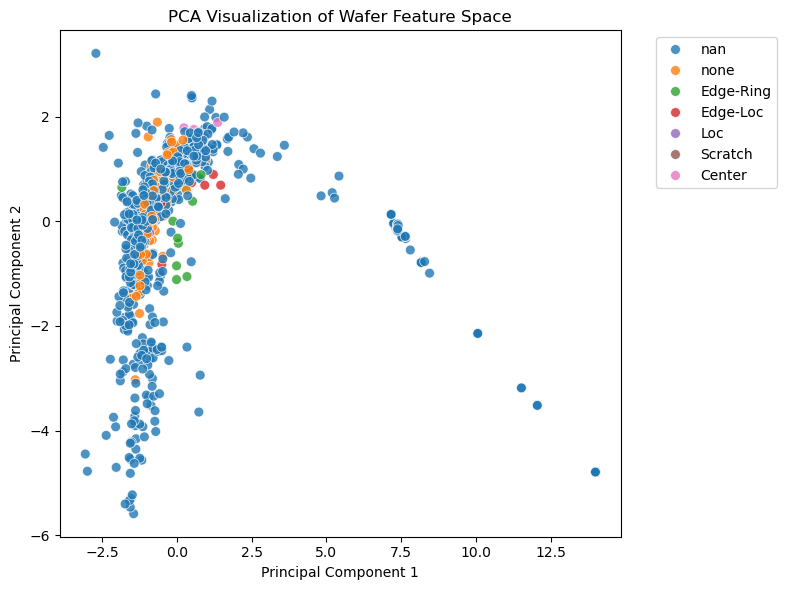

ROC-AUC: 0.8020


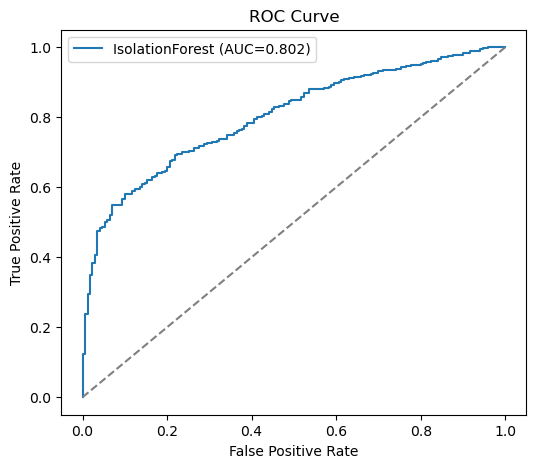

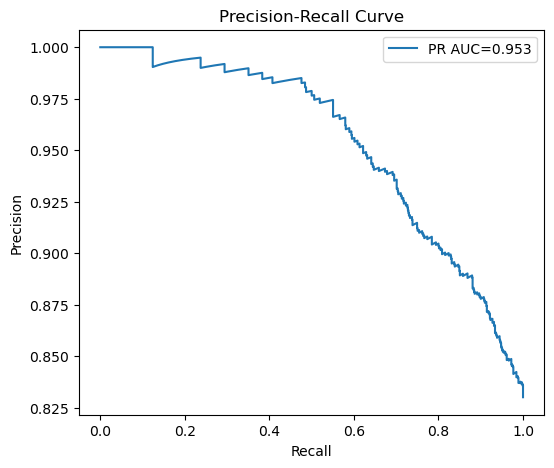

Top 10 most abnormal samples:
    label  anomaly_score
771   nan       0.264457
561   nan       0.264457
522   nan       0.264457
922   nan       0.263626
897   nan       0.263350
153   nan       0.263350
595   nan       0.263350
883   nan       0.263350
369   nan       0.263350
399   nan       0.263073


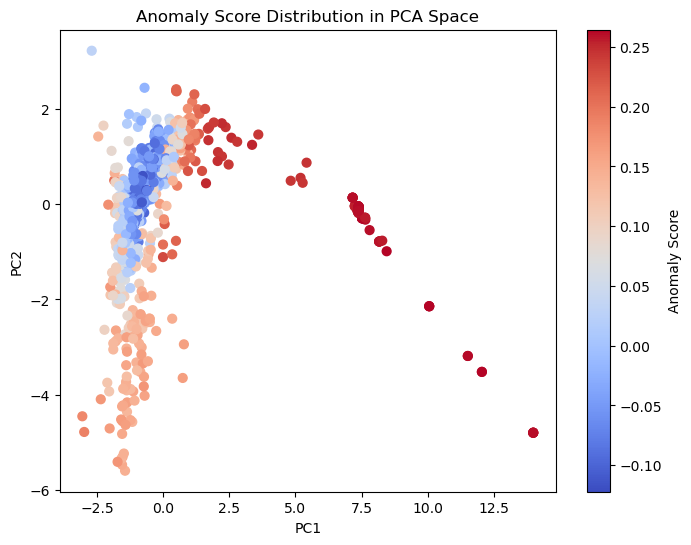

In [43]:

# Part A + B: Feature Visualization + Anomaly Detection

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# -----------------------------------------------
# Step 1. Load  features_df 
# -----------------------------------------------
features_df = features_df.dropna(subset=['defect_ratio'])  # remove NaNs if exist
X = features_df[
    ['defect_ratio', 'mean_intensity', 'std_intensity',
     'num_regions', 'avg_region_area', 'max_region_area',
     'centroid_x', 'centroid_y', 'radial_mean', 'radial_std',
     'edge_ratio', 'symmetry_lr', 'symmetry_ud', 'edge_density']
].fillna(0)

# optional: normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------------------------
# Step 2. PCA Visualization (Feature Analysis - A)
# -----------------------------------------------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
                hue=features_df['label'], palette='tab10', s=50, alpha=0.8)
plt.title('PCA Visualization of Wafer Feature Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# -----------------------------------------------
# Step 3. Train IsolationForest (Unsupervised Detector - B)
# -----------------------------------------------
# We'll simulate that "none" is normal class
mask_normal = features_df['label'] == 'none'
X_train = X_scaled[mask_normal]
X_test = X_scaled  # include all

iso = IsolationForest(
    n_estimators=200,
    contamination=0.1,  # expected proportion of anomalies
    random_state=42
)
iso.fit(X_train)

scores = -iso.decision_function(X_test)  # higher = more abnormal
features_df['anomaly_score'] = scores

# -----------------------------------------------
# Step 4. Evaluate with pseudo ground truth (B)
# -----------------------------------------------
# create binary label: normal=0, defect=1
y_true = (features_df['label'] != 'none').astype(int)
roc_auc = roc_auc_score(y_true, features_df['anomaly_score'])
print(f"ROC-AUC: {roc_auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_true, features_df['anomaly_score'])
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'IsolationForest (AUC={roc_auc:.3f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_true, features_df['anomaly_score'])
pr_auc = auc(recall, precision)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'PR AUC={pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# -----------------------------------------------
# Step 5. Visualize anomaly vs normal samples
# -----------------------------------------------
features_df_sorted = features_df.sort_values('anomaly_score', ascending=False)
print("Top 10 most abnormal samples:")
print(features_df_sorted[['label','anomaly_score']].head(10))

# Optional scatter to show anomaly vs PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=features_df['anomaly_score'], cmap='coolwarm', s=40)
plt.colorbar(label='Anomaly Score')
plt.title('Anomaly Score Distribution in PCA Space')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()


In [20]:
!pip install tensorflow


   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/332.0 MB 7.0 MB/s eta 0:00:48
   ---------------------------------------- 2.6/332.0 MB 6.5 MB/s eta 0:00:51
   ---------------------------------------- 3.7/332.0 MB 6.5 MB/s eta 0:00:51
    --------------------------------------- 5.2/332.0 MB 6.5 MB/s eta 0:00:51
    --------------------------------------- 6.6/332.0 MB 6.6 MB/s eta 0:00:50
    --------------------------------------- 8.1/332.0 MB 6.6 MB/s eta 0:00:49
   - -------------------------------------- 9.2/332.0 MB 6.6 MB/s eta 0:00:49
   - -------------------------------------- 10.7/332.0 MB 6.6 MB/s eta 0:00:49
   - -------------------------------------- 12.1/332.0 MB 6.6 MB/s eta 0:00:49
   - -------------------------------------- 13.4/332.0 MB 6.6 MB/s eta 0:00:49
   - -------------------------------------- 14.7/332.0 MB 6.6 MB/s eta 0:00:49
   - -------------------------------------- 16.0/332.0 MB 6.5 MB/s 

Training on 170 normal samples, testing on 1000 total samples.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 14)                  │             154 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 482 (1.88 KB)

 Trainable params: 482 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.2716 - val_loss: 0.2326
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2584 - val_loss: 0.2235
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2473 - val_loss: 0.2156
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2377 - val_loss: 0.2089
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2301 - val_loss: 0.2031
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2233 - val_loss: 0.1982
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2177 - val_loss: 0.1940
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2130 - val_loss: 0.1902
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2086 - val_loss: 0.1868
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2049 - val_loss: 0.1836
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2015 - val_loss: 0.1807
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1983 - val_lo

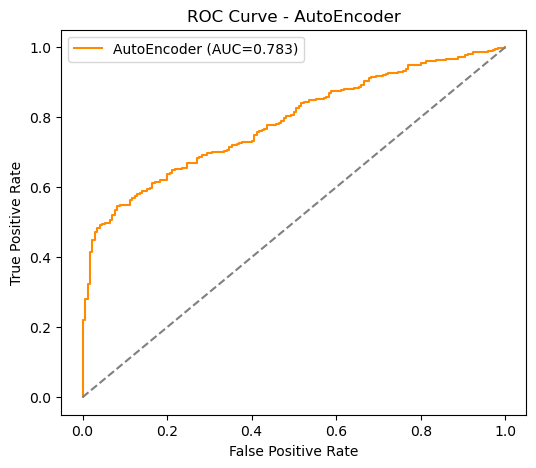

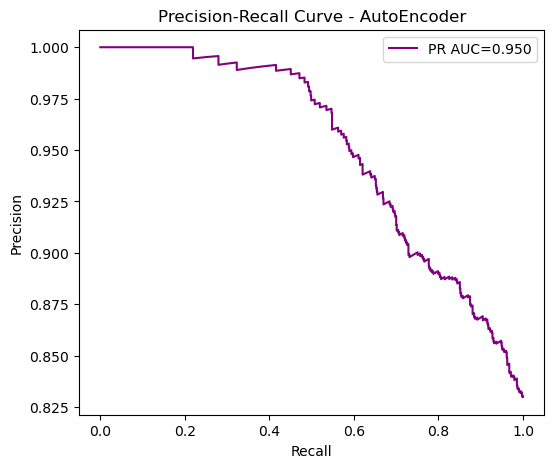

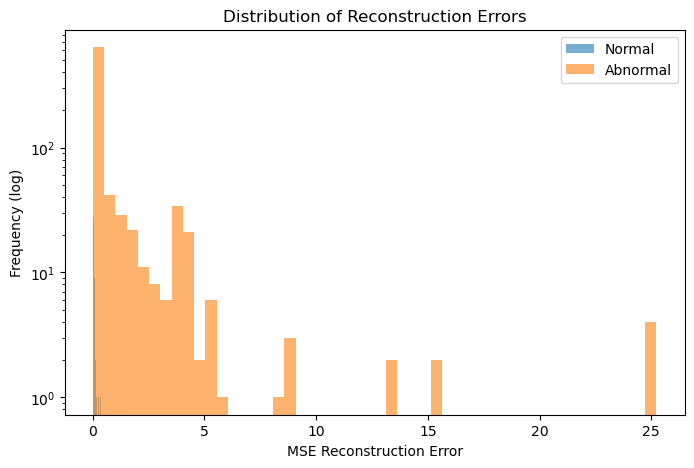

In [44]:
# Another option:Autoencoder

# Part B (Alternative): AutoEncoder Baseline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------------------------
# Step 1. Prepare data
# -----------------------------------------------
features = [
    'defect_ratio', 'mean_intensity', 'std_intensity',
    'num_regions', 'avg_region_area', 'max_region_area',
    'centroid_x', 'centroid_y', 'radial_mean', 'radial_std',
    'edge_ratio', 'symmetry_lr', 'symmetry_ud', 'edge_density'
]
df = features_df.dropna(subset=['defect_ratio']).fillna(0)
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split: normal samples for training, all for testing
X_train = X_scaled[df['label'] == 'none']
X_test  = X_scaled
y_true  = (df['label'] != 'none').astype(int)  # pseudo ground truth

print(f"Training on {X_train.shape[0]} normal samples, testing on {X_test.shape[0]} total samples.")

# -----------------------------------------------
# Step 2. Build AutoEncoder model
# -----------------------------------------------
input_dim = X_train.shape[1]
encoding_dim = 8  # compression size

input_layer = Input(shape=(input_dim,))
encoded = Dense(10, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(10, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(1e-3), loss='mse')

autoencoder.summary()

# -----------------------------------------------
# Step 3. Train AutoEncoder
# -----------------------------------------------
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)

# -----------------------------------------------
# Step 4. Compute reconstruction errors
# -----------------------------------------------
recon = autoencoder.predict(X_test)
mse = np.mean(np.square(X_test - recon), axis=1)
df['reconstruction_error'] = mse

# -----------------------------------------------
# Step 5. Evaluate
# -----------------------------------------------
roc_auc = roc_auc_score(y_true, mse)
precision, recall, _ = precision_recall_curve(y_true, mse)
pr_auc = auc(recall, precision)

print(f"\nAutoEncoder ROC-AUC: {roc_auc:.4f}")
print(f"AutoEncoder PR-AUC: {pr_auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_true, mse)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AutoEncoder (AUC={roc_auc:.3f})', color='darkorange')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AutoEncoder')
plt.legend(); plt.show()

# PR curve
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'PR AUC={pr_auc:.3f}', color='purple')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision-Recall Curve - AutoEncoder')
plt.legend(); plt.show()

# -----------------------------------------------
# Step 6. Visualize reconstruction errors
# -----------------------------------------------
plt.figure(figsize=(8,5))
plt.hist(df.loc[y_true==0, 'reconstruction_error'], bins=50, alpha=0.6, label='Normal')
plt.hist(df.loc[y_true==1, 'reconstruction_error'], bins=50, alpha=0.6, label='Abnormal')
plt.yscale('log')
plt.legend()
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('MSE Reconstruction Error'); plt.ylabel('Frequency (log)')
plt.show()
